# *Sales and Revenue Analysis*

### Importing Dataset from Kaggle

In [177]:
import datetime
import math

import kaggle

In [178]:
kaggle.api.authenticate()

In [179]:
kaggle.api.dataset_download_files(dataset="vivek468/superstore-dataset-final",path='Datasets',unzip=True)

Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final


The dataset has been downloaded to the Datasets Directory and we can access it through pandas read_csv method as usual.
 
Before doing that, we will import all other required dependencies below.

## Importing other Dependencies

In [180]:
import numpy as np 
import pandas as pd

## Plotting Tools 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-v0_8-white')

import us
from millify import millify
import calendar

A small clarifer for the code below: 

Running the default read_csv method doesn't work here because the input doesn't follow the regular UTF-8 encoding. 

Hence, after a brief Google Search, I found the following stack overflow page: [click here](https://stackoverflow.com/questions/48067514/utf-8-codec-cant-decode-byte-0xa0-in-position-4276-invalid-start-byte) that helped solve this problem by switching the regular encoding to the windows encoding.

In [181]:
sales_df = pd.read_csv(open("Datasets/Sample - Superstore.csv",encoding='windows-1254'))
print(f"The shape of the Dataframe is: {sales_df.shape}")

The shape of the Dataframe is: (9994, 21)


Let's get a quick overview of the dataframe that we just imported through the info method.

In [182]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Now, let's drop all ID, Name, and Code columns as they are unnecessary to our analysis.

In [183]:
sales_df.drop(columns=["Row ID","Order ID","Customer ID","Product ID","Postal Code","Product Name"],inplace=True)

Something that I notice is that the Date columns (i.e., Ship Date and Order Date) don't show up as datetime columns. We will fix that first.

In [184]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'],format='mixed')
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'],format='mixed')

While the Date columns have been fixed, the other columns are not in the correct data type yet and let's fix that now.

First, let's take a brief look at the remaining columns in order to gauge the relevant data types that they need to be.

In [185]:
sales_df.head() # Gives first 5 entries of the DataFrame

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [186]:
sales_df.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Category                 object
Sub-Category             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Now, we see that of the 15 columns, the first two are correctly marked and the last four columns are correctly inferred as well. It's the remaining nine columns that need to be modified into String columns.

So let's do that below:

In [187]:
sales_df.loc[:,sales_df.dtypes == object].head() #Identify all columns that are of object type

,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [188]:
idx = list(sales_df.loc[:,sales_df.dtypes == object].columns) # The required columns pulled from the sales DataFrame
sales_df[idx] = sales_df[idx].convert_dtypes(convert_string = True) # Converting Multiple Columns at once

As seen below, we now have assigned the required data types for all columns.

In [189]:
sales_df.dtypes

Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode        string[python]
Customer Name    string[python]
Segment          string[python]
Country          string[python]
City             string[python]
State            string[python]
Region           string[python]
Category         string[python]
Sub-Category     string[python]
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [190]:
sales_df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Group-by Visualizations 

A couple ways to group the data come to mind and they are as follows: 
1. By State 
2. By Region
3. By Ship Mode
4. By Segment
5. By Category and Sub-Category
6. By City (bit more niche, but worth a try)
7. By Year (extracted from the relevant Date columns)

Additionally, we could come up with some metrics that indicate how long it took for a product to shipped after the order has been placed, sale amounts, and profits as well.

First, let's set up the important categories that we'd like to group the data by, along with a list of our numeric columns of importance: Sales and Profit 

In [191]:
group_ls = ['State','Region','Ship Mode','Segment','Country','City']
numeric_cols = ['Sales','Profit'] # Numeric 

In [192]:
final_ls = [] # A list to store the different groupbys
for col in group_ls:
    temp_df = sales_df.groupby(by=col)
    final_ls.append(temp_df)

### By State

The first category we group the data by is State.
 
Since all our data is from exclusively US-Mainland Locations, it makes sense to plot the grouped data in a choropleth-style plot. 

To do this, I had previously imported the express module from the Plotly library along with the 'us[United States]' library to help with converting state names from our dataset into the required abbreviations for the JSON-based express library plot. 

In [193]:
set_1 = final_ls[0][numeric_cols].sum() 

In [194]:
# def plots_klargest(df: pd.DataFrame,cols: str or list[str],fig_sz:tuple=(10,10),k:int=10) -> (plt.Figure,plt.axes):
#     """
#     
#     :param df: A Pandas DataFrame
#     :param col_names: list of columns 
#     :param fig_sz: Required Figure Size
#     :param k: Amount of largest data points to be plotted
#     :return: plt.Figure and axes objects in a tuple
#     
#     Additional Information:
#     
#     Plotting is done using Pandas plot function (aka Matplotlib)
#     """
#     fig,axn = plt.subplots(nrows=2,ncols=1,figsize=(10,16),constrained_layout=True)
#     idx= .index
#     
#     
#     

(0.0, 100000.0)

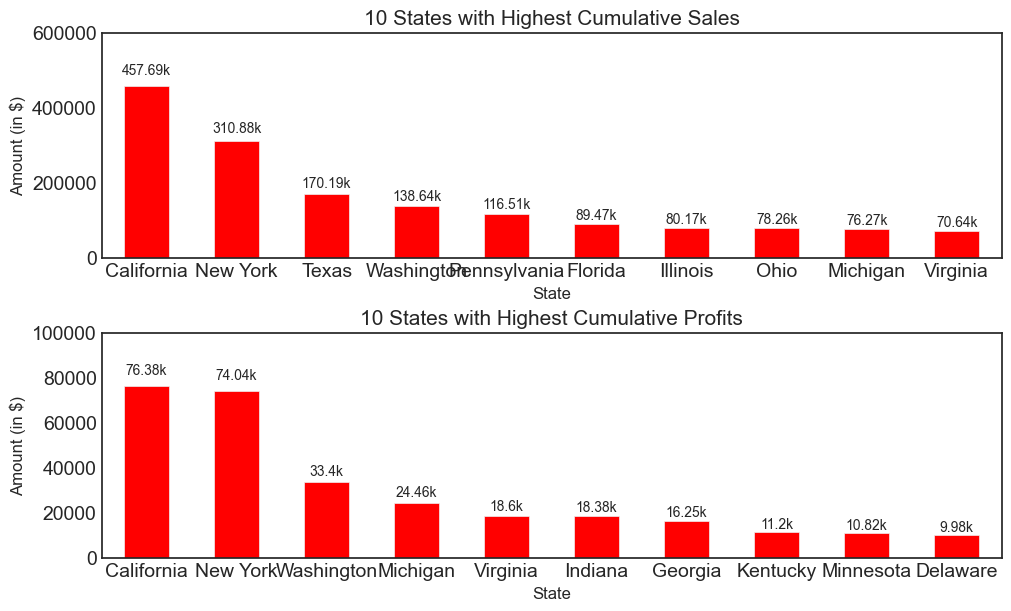

In [195]:
fig,axn = plt.subplots(nrows=2,ncols=1,figsize=(10,16),constrained_layout=True)
amt_large = 10
set_1_amt_large = set_1.nlargest(columns='Sales',n=amt_large)
idx_set_1_amt = set_1_amt_large.index
ax = (
    set_1_amt_large.
    plot
    (
         y = ['Sales'],
         kind='bar',
         figsize=(10,6),
         rot=0,
         color='red',
         legend=None,
         ax=axn[0]

    )
)
for bar in ax.patches:
    bar_ht = bar.get_height()*(1.05) # 500 is an arbitrarily chosen amount 
    bar_x = bar.get_x()+(bar.get_width())/2
    (ax.text
     (
        x=bar_x,
        y=bar_ht,
        s=f'{millify(bar.get_height(),precision=2)}',
        ha='center',
        va='bottom',
        fontsize=10
      )
     )
axn[0].set_ylabel(ylabel='Amount (in $)',fontsize=12)
axn[0].set_xlabel(xlabel='State',fontsize=12)
axn[0].set_title(label= f"{amt_large} States with Highest Cumulative Sales",size=15)
axn[0].set_ylim(bottom=0,top=600_000)

set_1_amt_Profit = set_1.nlargest(columns='Profit',n=amt_large)
ax2 = (
    set_1_amt_Profit.
    plot
    (
         y = ['Profit'],
         kind='bar',
         figsize=(10,6),
         rot=0,
         color='red',
         legend=None,
         ax=axn[1]
        
    )
)
for bar in ax2.patches:
    bar_ht = bar.get_height()*(1.05) # 500 is an arbitrarily chosen amount 
    bar_x = bar.get_x()+(bar.get_width())/2
    (ax2.text
     (
        x=bar_x,
        y=bar_ht,
        s=f'{millify(bar.get_height(),precision=2)}',
        ha='center',
        va='bottom',
        fontsize=10,
      )
     )
axn[1].set_ylabel(ylabel='Amount (in $)',fontsize=12)
axn[1].set_xlabel(xlabel='State',fontsize=12)
axn[1].set_title(label= f"{amt_large} States with Highest Cumulative Profits",size=15)
axn[1].set_ylim(bottom=0,top=100_000)

ADD EXPLANATION HERE

Presented below are the states that have above average Sales and Profit

In [196]:
avg = set_1[numeric_cols].mean() # Average Net Sales and Profit
filter_1 = (set_1 > avg).all(axis=1) # Filtering for States with above average profit and sales
final_set_1 = set_1[filter_1].sort_values(by='Sales',ascending=False)

In [197]:
final_set_1

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504
Indiana,53555.3600,18382.9363
Georgia,49095.8400,16250.0433


In [198]:
state_to_abbrev = dict([(state.name,state.abbr) for state in us.STATES_CONTINENTAL])
set_1_mod = set_1.reset_index()
set_1_mod['Abrrev_State'] = set_1_mod['State'].map(state_to_abbrev)

In [199]:
fig = px.choropleth(set_1_mod,color='Sales',locationmode='USA-states',scope='usa',locations='Abrrev_State',color_continuous_scale=px.colors.sequential.YlOrBr)
fig.update_layout(dragmode=False,title={'text':f'Cummulative Sales per State in Mainland USA [Average Sales = ${round(set_1_mod.Sales.mean(),2)} ]','x':0.5,'xanchor':'center'})
fig.show()

In [200]:
fig = px.choropleth(set_1_mod,color='Profit',locationmode='USA-states',scope='usa',locations='Abrrev_State',color_continuous_scale=px.colors.sequential.YlOrBr)
fig.update_layout(dragmode=False,title={'text':f'Cummulative Profits per State in Mainland USA [Average Profit = ${round(set_1_mod.Profit.mean(),2)}]','x':0.5,'xanchor':'center'})
fig.show()

### By Region

In [201]:
final_ls[1] = sales_df.groupby(by=['Region','State'])

In [202]:
sum_region_df = final_ls[1][numeric_cols]
reg_df = sum_region_df.sum().reset_index(drop=False)

In [203]:
sum_region_df.sum()['Sales'].unstack(level=0).sum(axis=0) 

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
dtype: float64

In [204]:
reg_df['Abrrev_State'] = reg_df['State'].map(state_to_abbrev)

Honestly, plots are not required here, given that the previous set of choropleth mostly conveys the necessary regional information.

In [205]:
# Create a choropleth with dropdown filter
regions = reg_df["Region"].unique()
traces = []

for region in regions:
    region_data = reg_df[reg_df["Region"] == region]
    traces.append(
        go.Choropleth(
            locationmode="USA-states",
            locations=region_data["Abrrev_State"],
            z=region_data["Sales"],
            name=region,  # Legend label for each region
            visible=True if region == "All" else False,  # Initially show all regions
            colorbar_title="Sales",
            colorscale=px.colors.sequential.YlOrBr,
            showlegend=False
        )
    )
fig = go.Figure(data=traces)
# Add dropdown filters
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": "All",
                    "method": "update",
                    "args": [{"visible": [True]}, {"title": "All Regions"},{'showlegend':[False]}],
                },
                {
                    "label": "West",
                    "method": "update",
                    "args": [
                        {"visible": list(reg_df.Region.unique() == "West")},
                        {"title": "Sales in West Region"},
                    ],
                },
                {
                    "label": "South",
                    "method": "update",
                    "args": [
                        {"visible": list(reg_df.Region.unique() == "South")},
                        {"title": "Sales in South Region"},
                    ],
                },
                {
                    "label": "East",
                    "method": "update",
                    "args": [
                        {"visible": list(reg_df.Region.unique() == "East")},
                        {"title": "Sales in East Region"},
                    ],
                },
                {
                    "label": "Central",
                    "method": "update",
                    "args": [
                        {"visible": list(reg_df.Region.unique() == "Central")},
                        {"title": "Sales in Central Region"},
                    ],
                },
            ],
            "direction": "down",
            "showactive": True
        }
    ],
    dragmode=False,title="Dynamic Visualization of Sales Breakdown by US Regions (Click All again)",
    geo=dict(scope="usa"),
)

# Show the map
fig.show()

### By Ship Mode

In [295]:
shp_md = final_ls[2][numeric_cols].sum()
shp_md_pct = 100*shp_md/shp_md.sum()
counts = (final_ls[2][numeric_cols].count()/final_ls[2][numeric_cols].count().sum())*100

In [296]:
shp_md_fig,axs = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(10,12))
plt.close()

In [297]:
shp_md.plot(y = "Sales",kind='bar',rot=0,color='red',legend=None,ax=axs[0])
plt.ylabel(ylabel='Amount (in Millions of $)',fontsize=12)
plt.xlabel(xlabel='Ship Mode',fontsize=12)
for i, value in enumerate(shp_md.Sales.values):
    axs[0].text(i, value + 50, f"{round(shp_md_pct.Sales.iloc[i],2)}%", ha='center', va='bottom',color='k')
axs[0].set_title(label='Cumulative Sales Classified by Ship Mode with Pct Splits',size=12)
axs[0].set_ylabel(ylabel='Amount (in $)',size=12)
axs[0].set_ylim(bottom = 0, top = (1.05)*axs[0].get_ylim()[1])
# plt.show()   
plt.close()   

In [298]:
shp_md.plot(y = "Profit",kind='bar',rot=0,color='blue',legend=None,ax=axs[1])
plt.ylabel(ylabel='Amount (in Millions of $)',fontsize=12)
plt.xlabel(xlabel='Ship Mode',fontsize=12)
for i, value in enumerate(shp_md.Profit.values):
    axs[1].text(i, value, f"{round(shp_md_pct.Profit.iloc[i],2)}%", ha='center', va='bottom',color='k')
axs[1].set_title(label='Cumulative Profits Classified by Ship Mode with Pct Splits',size=12)
axs[1].set_ylabel(ylabel='Amount (in $)',size=12)
axs[1].set_ylim(bottom = 0, top = (1.05)*axs[1].get_ylim()[1])
plt.close()

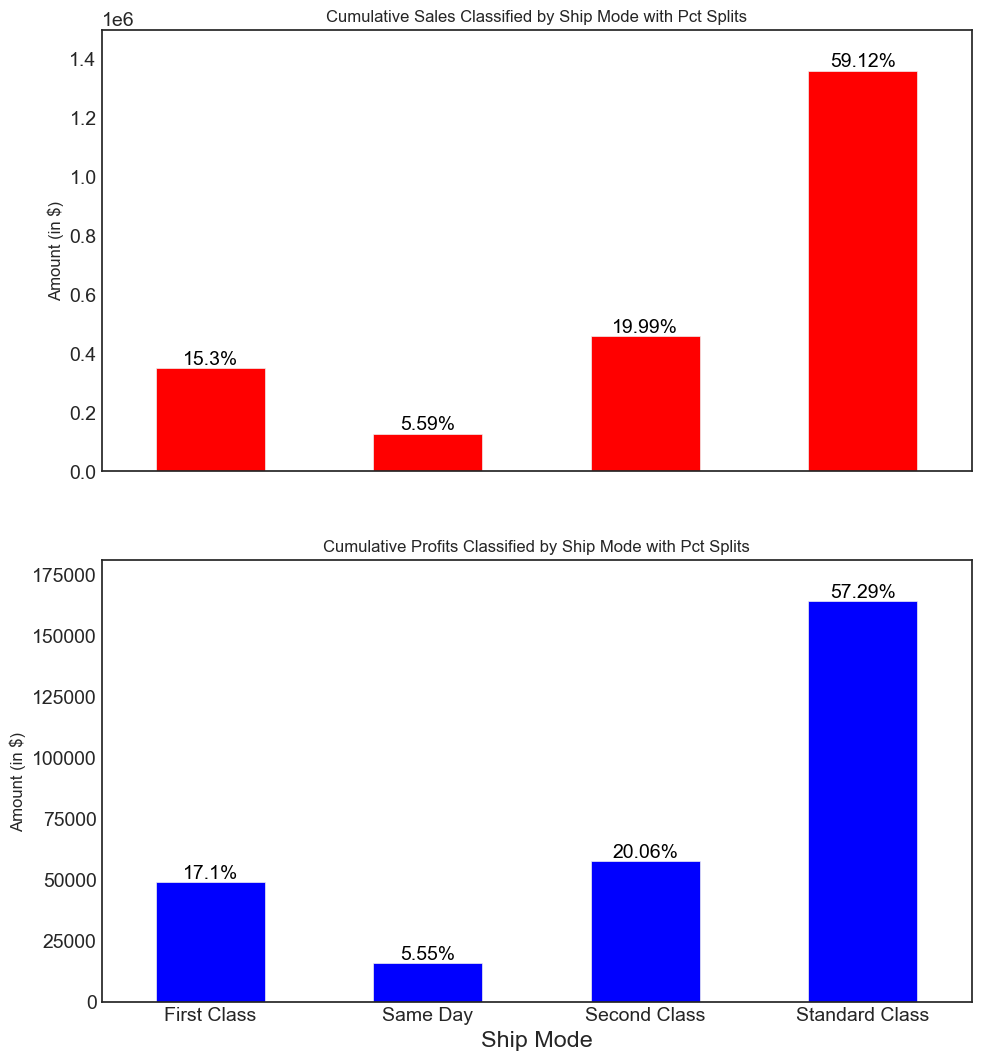

In [299]:
shp_md_fig

In [300]:
shp_md_pie = (
    px.
    pie
    (
        values=shp_md.Sales,
        names = list(shp_md_pct.index),
        title = 'Cumulative Sales Classified by Ship Mode with Pct Splits',
        color_discrete_sequence=px.colors.sequential.RdBu,
    )  
)
shp_md_pie.update_traces(textinfo = 'percent+label',hoverinfo = 'percent+label',hole=0.3)
shp_md_pie.update_layout(title_x = 0.2,title_font_size = 20,showlegend=False,width=800,height = 600)
shp_md_pie.show()

### By Segment

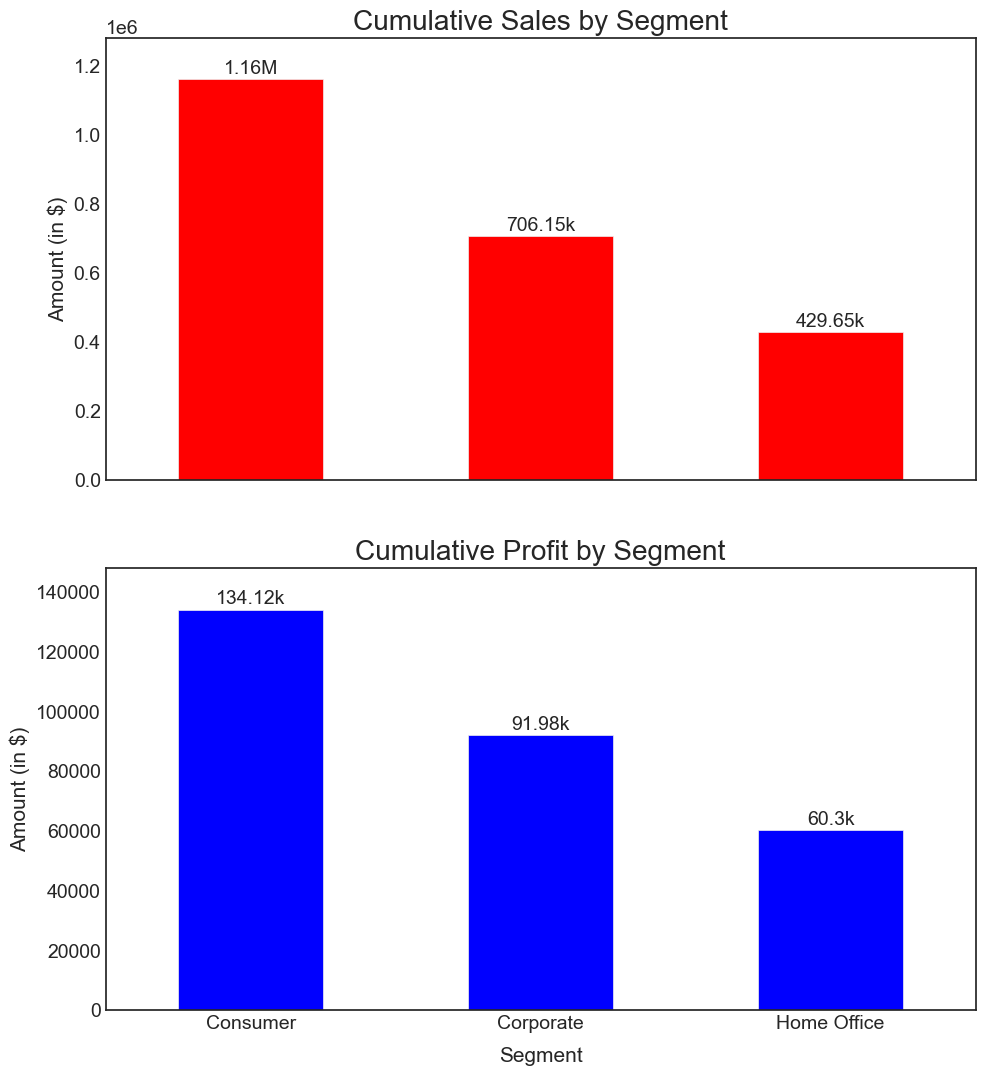

In [301]:
seg_fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(10,12),sharex=True)
plt.close(seg_fig)
final_ls[3][numeric_cols].sum().plot(kind='bar',rot=0,y='Sales',legend=None,title='Cumulative Sales by Segment',ax = axs[0],color='r')
plt.ylabel(ylabel='Amount (in millions of $)',size=12)
plt.xlabel(xlabel='Segment',size=12,labelpad=10)
plt.tight_layout()

final_ls[3][numeric_cols].sum().plot(kind='bar',rot=0,y='Profit',legend = None,title='Cumulative Profit by Segment',ax = axs[1],color='blue')
plt.ylabel(ylabel='Amount (in millions of $)',size=12)
plt.xlabel(xlabel='Segment',size=12,labelpad=10)
plt.tight_layout()
plt.close()

for bars in axs[0].patches:
    ht = bars.get_height()*(1.005)
    b_x = bars.get_x()+(bars.get_width())/2
    (
        axs[0].text
        (
            x=b_x,
            y=ht,
            s=f"{millify(bars.get_height(),precision=2)}",
            ha='center',
            va='bottom'
        )
    )
axs[0].set_ylim(bottom=0,top = (1.05)*axs[0].get_ylim()[1])
axs[0].set_ylabel(ylabel="Amount (in $)",size=15)

for bars in axs[1].patches:
    ht = bars.get_height()*(1.005)
    b_x = bars.get_x()+(bars.get_width())/2
    (
        axs[1].text
        (
            x=b_x,
            y=ht,
            s=f"{millify(bars.get_height(),precision=2)}",
            ha='center',
            va='bottom'
        )
    )
axs[1].set_ylim(bottom=0,top = (1.05)*axs[1].get_ylim()[1])
axs[1].set_xlabel(xlabel="Segment",size=15,labelpad=10)
axs[1].set_ylabel(ylabel="Amount (in $)",size=15)

seg_fig

### By Category and Sub-Category

In [318]:
cat_splits = sales_df.groupby(by=['Category','Sub-Category'])
large_cat_data = cat_splits[numeric_cols].sum().nlargest(columns = ['Profit'],n=10)
small_cat_data = cat_splits[numeric_cols].sum().nsmallest(columns = ['Profit'],n=10)

In [319]:
print(f'The {list(large_cat_data.head(1).index)[0][0]} Category and {list(large_cat_data.head(1).index)[0][1]} Sub-Category has the largest Profit of ${large_cat_data.head(1).Profit.iloc[0]}')

The Technology Category and Copiers Sub-Category has the largest Profit of $55617.8249


In [320]:
print(f'The {list(small_cat_data.head(1).index)[0][0]} Category and {list(small_cat_data.head(1).index)[0][1]} Sub-Category has the smallest Profit of ${small_cat_data.head(1).Profit.iloc[0]}')

The Furniture Category and Tables Sub-Category has the smallest Profit of $-17725.4811


In [321]:
print(f'The Average Cumulative Profit is ${round(cat_splits[numeric_cols].sum().mean().Profit,4)}')

The Average Cumulative Profit is $16846.8836


In [217]:
print(f'The Median Cumulative Profit is ${round(cat_splits[numeric_cols].sum().median().Profit,4)}')

The Median Cumulative Profit is $13059.1436


In [356]:
(
    cat_splits[numeric_cols].
    count().
    idxmax().
    rename('Maxes')
 )

Sales     (Office Supplies, Binders)
Profit    (Office Supplies, Binders)
Name: Maxes, dtype: object

### By City

In [357]:
city_srs = final_ls[5][numeric_cols].sum()

In [358]:
large_profits = city_srs.nlargest(columns=['Profit'],n=10)
avg_profits = large_profits.mean()

In [221]:
fig = px.bar(data_frame=large_profits,y='Profit',labels='Profit',title = 'Cities with the 10 largest Profit Margins',width=1200,height = 800)
fig.update_layout(title_x = 0.5,title_font_size = 20,yaxis_title = 'Profit (in $)')
fig.add_trace(go.Scatter(x=list(large_profits.index),y=len(list(large_profits.index))*[avg_profits.Profit],name = 'Average Profit',hoverinfo='skip'))

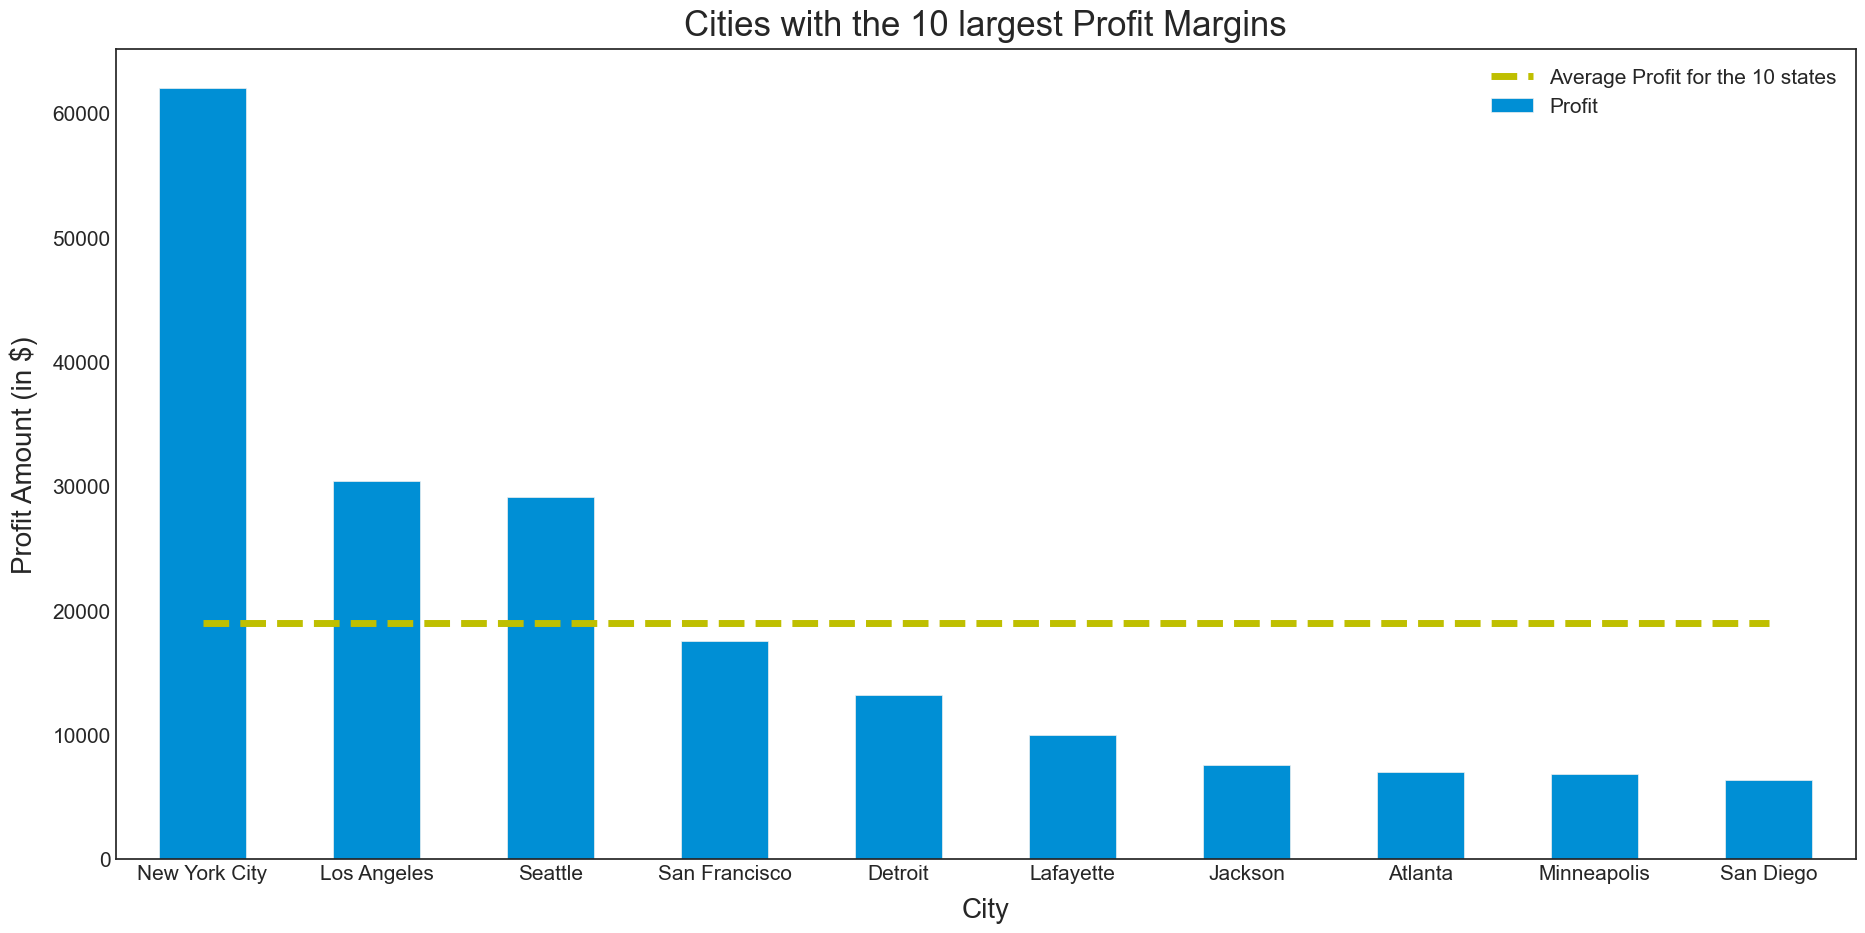

In [359]:
large_profits.plot(kind='bar',y='Profit',rot=0,figsize=(20,10),fontsize=15)
plt.plot(len(list(large_profits.index))*[avg_profits.Profit],'y--',linewidth=5,animated=True,label='Average Profit for the 10 states')
plt.legend(fontsize=15)
plt.xlabel(xlabel='City',size=20,labelpad=10)
plt.ylabel(ylabel='Profit Amount (in $)',size=20,labelpad=10)
plt.title(label='Cities with the 10 largest Profit Margins',size=25,pad=10)
plt.show()

### By Time (i.e. Years, Months) 

In [222]:
order_yr_gb = sales_df.groupby(by=sales_df['Order Date'].dt.year)

<Axes: title={'center': 'YoY percent change of Profit'}, xlabel='Order Date'>

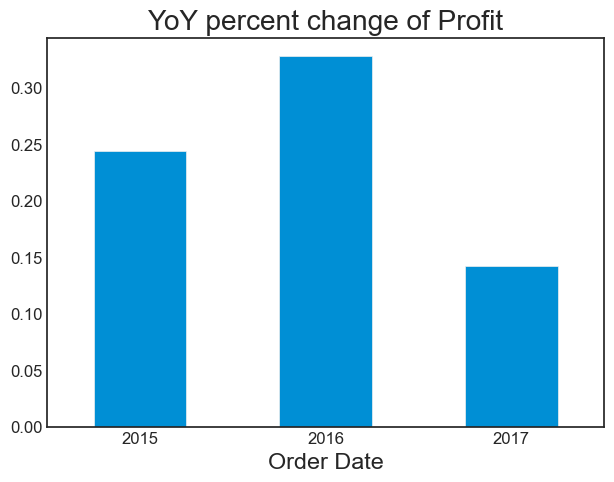

In [223]:
yoy_dat = order_yr_gb[numeric_cols].sum().pct_change(periods=1).drop(index=[2014])
yoy_dat.plot(kind='bar',y='Profit',rot=0,legend=None,title='YoY percent change of Profit',fontsize=12)

In [224]:
sales_df.insert(loc=2,column="Elapsed_Time",value=sales_df['Ship Date'] - sales_df['Order Date'])

In [225]:
sales_df.head(n=10)

,Order Date,Ship Date,Elapsed_Time,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,3 days,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,3 days,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,4 days,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,7 days,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,7 days,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,2014-06-09,2014-06-14,5 days,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,2014-06-09,2014-06-14,5 days,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,2014-06-09,2014-06-14,5 days,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,2014-06-09,2014-06-14,5 days,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,2014-06-09,2014-06-14,5 days,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [226]:
dt_elapse_gb = sales_df.groupby(by=[sales_df['Order Date'].dt.year])

In [227]:
final_elapse_dt = dt_elapse_gb['Elapsed_Time'].value_counts().sort_index(level=[0])
unstacked_final_elapse_dt = final_elapse_dt.unstack(level=1)

In [228]:
X = list(final_elapse_dt.index.get_level_values(level=1).unique().days)
Y= list(final_elapse_dt.index.get_level_values(level=0).unique())
sp = unstacked_final_elapse_dt.shape
contour_set = np.random.rand(sp[0],sp[1])

In [229]:
fig = go.Figure(go.Heatmap
                (
                    z=unstacked_final_elapse_dt,
                    x=X,
                    y=Y,
                    colorscale='Viridis',
                    colorbar=dict(title=dict(text='Counts',side='right',font=dict(size=14))),
                    hoverinfo='z',
                )
                )
(
    fig.update_layout
    (
        title = 'Visualizing the Time Elapsed between Order & Ship Dates',
        title_x=0.5,
        xaxis_title = 'Number of Days Elapsed',
        yaxis_title = 'Year',
        width=800,
        height=800,
        yaxis=dict(tickvals = list(range(2013,2018))),
        dragmode=False
    )
)

In [230]:
dt_elapse_gb_spm = sales_df.groupby(by=['Ship Mode',sales_df['Order Date'].dt.year])

In [231]:
final_gb_spm = \
(
    dt_elapse_gb_spm['Elapsed_Time'].
    value_counts().
    unstack(level=1).
    fillna(value=0).
    sum(axis=1).
    unstack(level=0).
    fillna(value=0)
)

In [232]:
100*final_gb_spm/final_gb_spm.sum(axis=0)

Ship Mode,First Class,Same Day,Second Class,Standard Class
Elapsed_Time,,,,
0 days,0.000000,95.58011,0.000000,0.000000
1 days,22.366710,4.41989,0.051414,0.000000
2 days,37.061118,0.00000,39.280206,0.000000
3 days,40.507152,0.00000,19.537275,0.033512
4 days,0.065020,0.00000,19.074550,40.247989
5 days,0.000000,0.00000,22.056555,29.155496
6 days,0.000000,0.00000,0.000000,20.157507
7 days,0.000000,0.00000,0.000000,10.405496


In [233]:
fig = px.bar(data_frame=final_gb_spm,title = 'Alternate Visualization of Delays across Shipping Methods',hover_data={'Ship Mode':True})
fig.update_layout(title_x=0.5,xaxis_title="Time Elapsed (in days)",yaxis_title="Counts",dragmode=False,xaxis=dict(tickvals = final_gb_spm.index,ticktext=list(range(0,8))))

In [234]:
final_pct_change_df = dt_elapse_gb[numeric_cols].sum().pct_change(1).drop(index=[2014])
# plt.xticks(ticks = np.arange(2015,2018))

In [235]:
mn = final_pct_change_df.values.min()
mx = final_pct_change_df.values.max()
diff = mx-mn/np.prod(final_pct_change_df.shape)

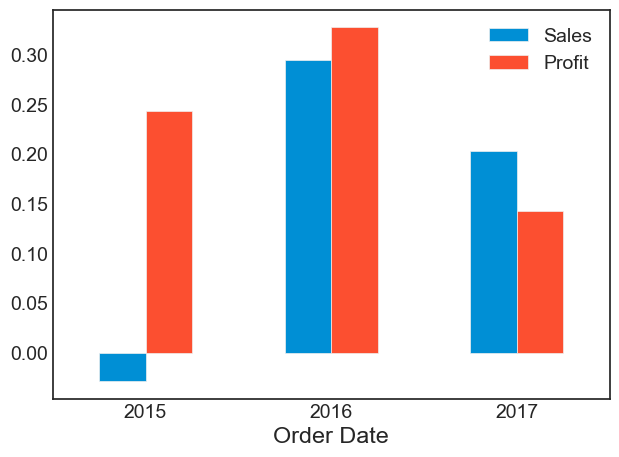

In [236]:
final_pct_change_df.plot(kind='bar',rot=0)
# plt.text(x=2015,y=final_pct_change_df.loc[2015,'Sales'],s=final_pct_change_df.loc[2015,'Sales'])
plt.show()

### By Month

In [237]:
dt_elapse_mnth_gb = sales_df.groupby(by=[sales_df['Order Date'].dt.year,sales_df['Order Date'].dt.month])

In [238]:
final_plot_pm = \
(
    dt_elapse_mnth_gb[numeric_cols]
    .sum()
    .unstack(level=0)
    .pct_change()
    .stack(future_stack=True)
    .sort_index(level=1)
    .swaplevel(0, 1)
)

In [239]:
idx_set = list(final_plot_pm.index.get_level_values(level=0).unique())
label_set = [month for month in calendar.month_name if month]

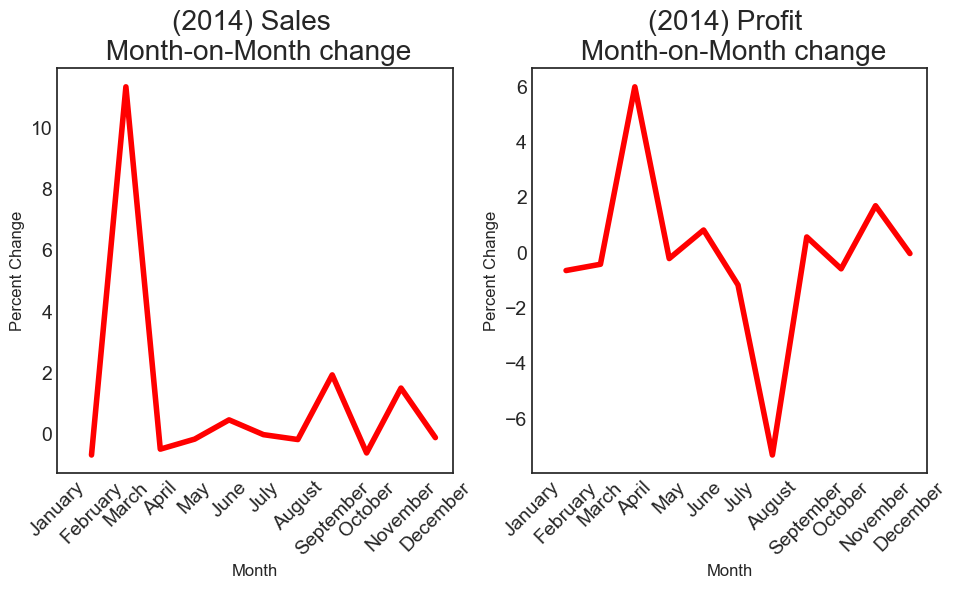

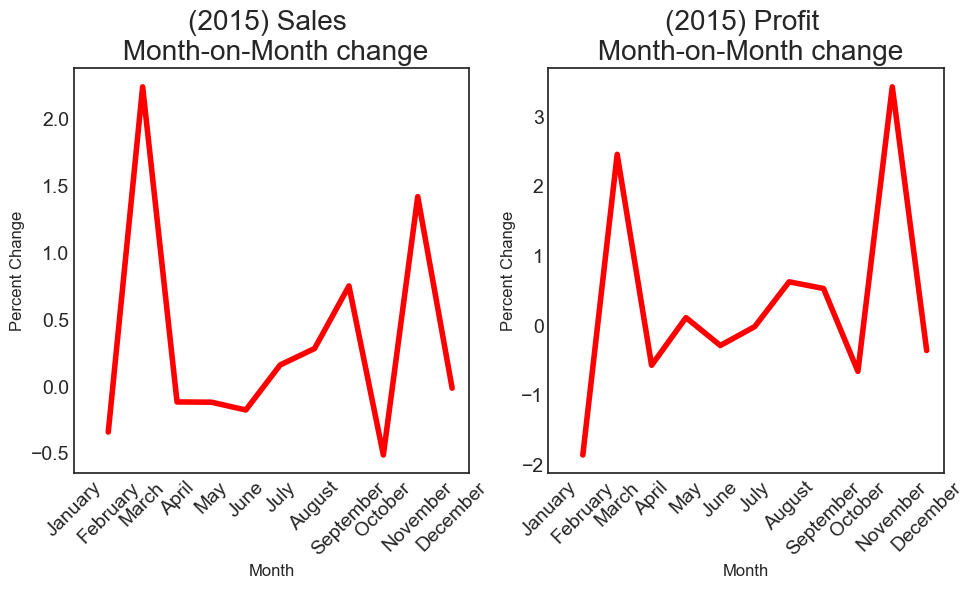

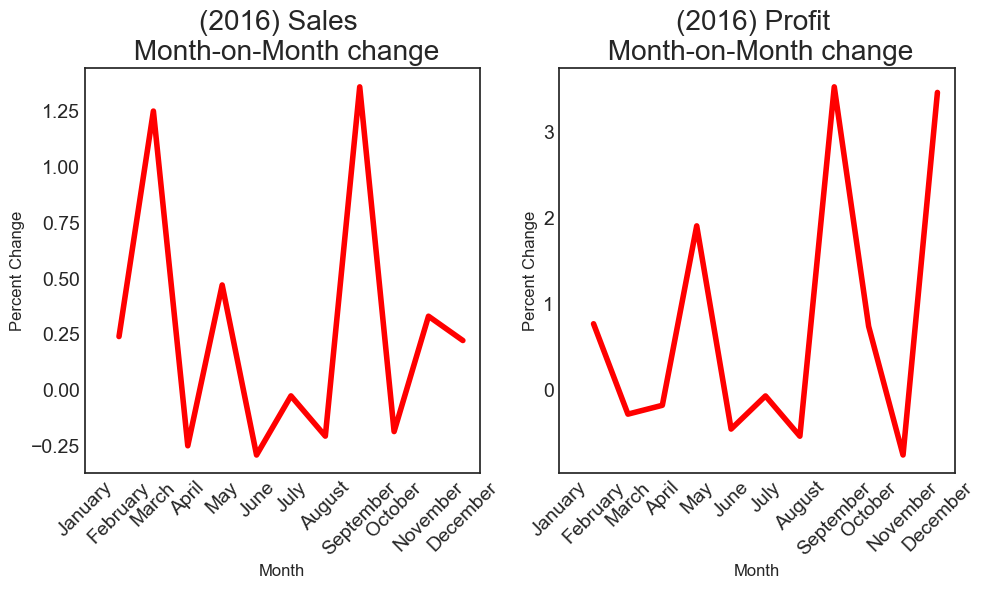

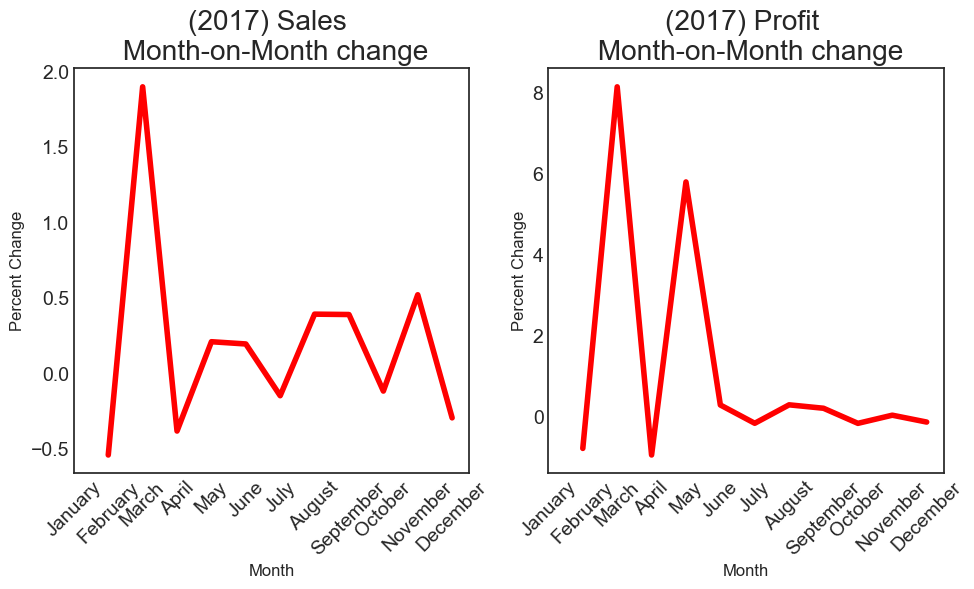

In [240]:
for idx in idx_set:
    fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    it_var = 0
    for nm in numeric_cols:
        final_plot_pm.loc[idx,:].plot(y=nm, kind='line',rot=45,figsize=(10,5),legend=None,color='red',ax=axs[it_var])
        axs[it_var].set_xlabel(xlabel='Month',size=12)
        axs[it_var].set_ylabel(ylabel='Percent Change',size=12)
        # axs[it_var].set_suptitle(t=f'({idx}) {nm}')
        axs[it_var].set_title(label=f"({idx}) {nm} \n Month-on-Month change")
        (
            axs[it_var].set_xticks
         (
            ticks=list(final_plot_pm.index.get_level_values(level=1).unique()),
            labels=label_set
         )
        )
        it_var+=1

#### Insights from the line plots above:


In [241]:
hold_1 = dt_elapse_mnth_gb[numeric_cols].sum().unstack(level=0)
hold_2 = hold_1.mean(axis=0).unstack(level=0)

<Axes: xlabel='Order Date'>

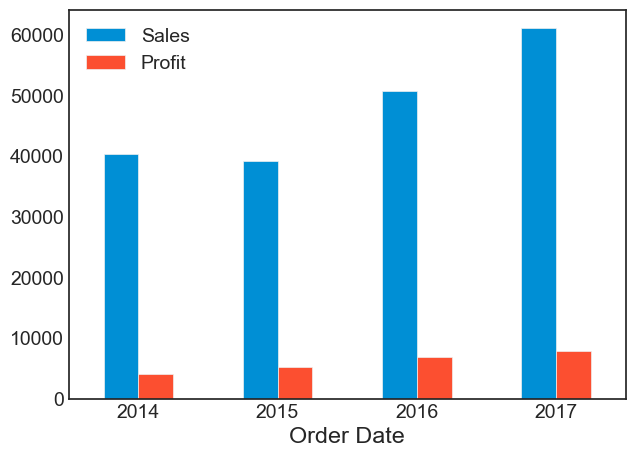

In [242]:
hold_2.plot(kind='bar',rot=0)

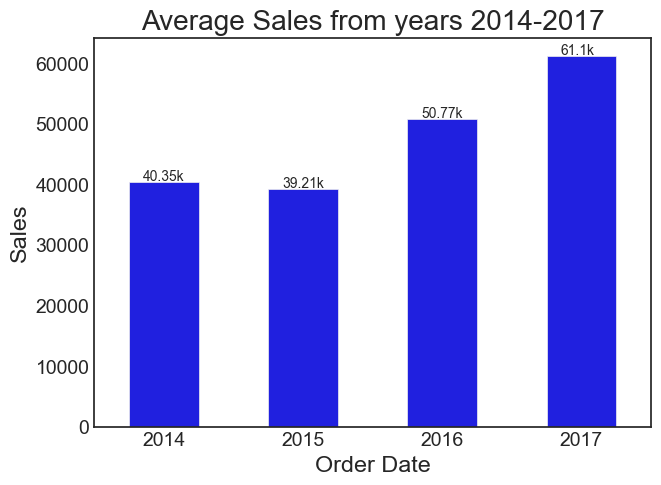

In [243]:
hold_temp_1 = hold_2
hold_temp_1['Sales_str'] = hold_temp_1['Sales'].apply(func= lambda x: millify(x,precision=2))
fig = sns.barplot(data=hold_2,x='Order Date',y='Sales',color='blue',width=0.5)
fig.set_title(label='Average Sales from years 2014-2017')

for bar in fig.patches:
    x_val = bar.get_x()+(bar.get_width()/5)
    y_val = bar.get_height()*(1.005)
    plt.text(x=x_val, y=y_val, s=str(millify(bar.get_height(), precision=2)), size=10)
